In [1]:
#plt.cla() clears an axis, i.e. the currently active axis in the current figure. It leaves the other axes untouched.
#plt.clf() clears the entire current figure with all its axes, but leaves the window opened, such that it may be reused for other plots.
#plt.close() closes a window, which will be the current window, if not specified otherwise.
#_x = np.arange(1, 15, 0.25)
#plt.plot(_x, f(_x))
#plt.xlabel("Ось X")
#plt.ylabel("Ось Y")
#plt.grid(True)
#plt.show()

#pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data', sep=',', header=None)

#https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
#

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
iris = load_iris()
X = np.array(iris.data) # массив numpy
Y = np.array(iris.target) # массив numpy
#m_iris = np.append(X, Y)
#print(iris)

#print(iris.feature_names)
#print(iris.target_names[1])
#print(type(iris.data))
#print(type(iris))
#iris_df = pd.DataFrame(iris, columns = iris.feature_names)
#print(iris_df)

In [2]:
def split_data(df, dt, perception):#разделение датасета на тестовую и тренировочную
    split=np.array([random.random() < perception for i in range(len(df))])
    return df[split], df[~split], dt[split], dt[~split]
#на самом деле штука бесполезная оказалась, но на будущее ОНО ЗДЕСЬ

In [3]:
def euclidianD(d1, d2):
    dist = 0
    for i in range(len(d1)):
        dist += np.square(d1[i] - d2[i])
    return np.sqrt(dist)
#distances = np.linalg.norm(X[1] - X[2], ord=2) #готовая евклидова метрика одной строчкой, просто сказали вычислить функцией
#print(np.linalg.norm(X[0] - X[148], ord=2))

In [4]:
def Kernel(vertex_distance, window_size): #Ядро Епанечникова
    r = vertex_distance / window_size
    control_r = True if abs(r) <= 1 else False
    r *= control_r
    K = 3/4 * (1 - r*r)
    return K

In [5]:
def calculate_weights(k, sortD):
    weights = np.zeros(np.unique(sortD[1]).size)
    #weights = np.zeros(k + 1) #k-й элемент хранит суммарный вес
    for i in range(k):
        weights[int(sortD[1][i])] += Kernel(sortD[0][i], sortD[0][k])
    return weights

In [6]:
def KNN(new_iris, X, Y, k):
    distances = np.zeros(len(X))
    for i in range(len(X)):
        distances[i] = euclidianD(new_iris, X[i])
    dist_matrix = np.array([distances, Y])
    sortD = dist_matrix[:, dist_matrix[0, :].argsort()] #отсортированный массив расстояний, где столбцы - ирисы, 0 строка - расстояния, 1 строка - соответствующие классы
    weights = calculate_weights(k, sortD)
    return np.argmax(weights)

In [7]:
def LOO(k, X, Y):
    error = 0
    for i in range(len(Y)):
        check = X[i]
        _X = np.delete(X, i, 0)
        _Y = np.delete(Y, i)
        if (KNN(check, _X, _Y, k) != Y[i]):
            error += 1
        #X = np.insert(X, i, check, 0)
        #Y = np.insert(Y, i, prev_species)
    return error #/ len(Y)

In [8]:
def accuracy(prediction, test): 
    correct = 0
    for i in range (len(test)):
        if prediction[i] == test[i]: #predict_Y[i] == Y_train[i]
            correct += 1
    return (correct / len(test))

In [9]:
def plot_loo(X, Y):
    loo = np.zeros(len(X) - 2)
    for i in range(len(X) - 2):
        loo[i] = LOO(i+1, X, Y)
    KK = range(1, len(X) - 1)
    plt.plot(KK, loo)
    plt.xlabel("K")
    plt.ylabel("LOO (доля ошибок от общего числа)")
    plt.scatter(KK[0], loo[0], c='mediumseagreen')
    plt.xticks(np.arange(0, KK[len(KK) - 1], 10))
    plt.yticks(np.arange(0, loo[len(loo) - 1], 1))
    plt.grid(True)
    #all_ks = []
    #for i in range(len(loo)):
    #    if (loo[i]==np.amin(loo)):
    #        all_ks.append(i+1)
    print(f"Оптимальный k: {np.argmin(loo)+1}, минимальная доля ошибок при нём: {np.amin(loo)}. K {np.argmax(loo)+1} с максимальной долей ошибок {np.amax(loo)}")
    #plt.show()
    return plt

In [10]:
#X_train, X_test, Y_train, Y_test=split_data(X, Y, 0.2) 
#predict_Y_train = np.zeros(len(Y_train))
#predict_Y_test = np.zeros(len(Y_test))
#print(X_train, X_test, Y_train, Y_test)
#predict = np.zeros(len(Y))
#a = 0 #ошибки
#na = 0 #правильные
#for i in range(1, len(Y)):
#    prev = Y[i] #пред класс
#    p = X[i] #пред эл
#    _X = np.delete(X, i, 0)
#    _Y = np.delete(Y, i)
#    predict[i] = KNN(p, _X, _Y, 148)#судак-тудак
#    if (predict[i] != Y[i]):
#        a+=1
#        #print('{} {} {}'.format(predict[i], Y[i], i))
#    else:
#        na+=1
#        #print('{} {} {}'.format(predict[i], Y[i], i))

Оптимальный k: 14, минимальная доля ошибок при нём: 4.0. K 147 с максимальной долей ошибок 19.0


<function matplotlib.pyplot.show(close=None, block=None)>

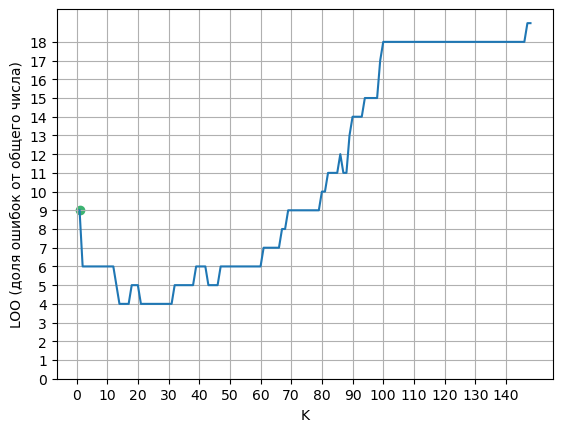

<Figure size 1500x400 with 0 Axes>

In [14]:
looiris = plot_loo(X, Y)
looiris.figure(figsize=(15, 4))
looiris.show

for i in range(len(loo)):
    if (loo[i]==np.amin(loo)):
        print(i+1)

In [13]:
##считаю расстояния от вектора new_iris
#distances = np.zeros(len(X))
#for i in range(len(X)):
#    distances[i] = euclidianD(new_iris, X[i])
##print(distances)

In [14]:
#dist_matrix = np.array([distances, Y])
#sortD = dist_matrix[:, dist_matrix[0, :].argsort()] 
##sortD = np.argsort()
##sortD = dist_matrix[dist_matrix[:, 0].argsort()]
#k = 7 #int(input("Количество соседей: "))
##print(sortD[1, 130])
#print(sortD)

In [15]:
#n_weights = calculate_weights(k, sortD)
#print(n_weights)
#put in index 
#sortD[1][i]
#ля, нада ж по классам вес считать, ыуыэ
#np.unique(Y).size

In [16]:
#knn и тест, и трен 
#расстояние от объектов теста до всех объектов обучающей выборки 

In [17]:
#ya durak, the class is in the Y[i] if we talk about the X[i]
#можно в вектор расстояний (неотсортированный) добавить столбец с Y (классами), 
#а потом получившуюся матрицу отсортировать по расстояниями
#print(X)
#print(Y)

In [18]:
#prev_species = Y[0]
#check = X[0]
#X = np.delete(X, 0, 0)
#Y = np.delete(Y, 0)
#print(X)
#print(len(X), ' ', len(Y))
#print(Y)
#if (KNN(check, X, Y, 1) != prev_species):
#    error += 1
#X = np.insert(X, 0, check, 0)
#Y = np.insert(Y, 0, prev_species)

In [ ]:
def DataFrame_split_XY(df):
        dfX = df.drop(df.columns[len(df.columns) - 1], axis=1)
        dfX = dfX.values
        dfY = df[df.columns[len(df.columns) - 1]]
        dfY = dfY.values
        return dfX, dfY

In [ ]:
column_names = ["1. area", "2. perimeter", "3. compactness = 4*pi*A/P^2", "4. length of kernel", "5. width of kernel", "6. asymmetry coefficient", "7. length of kernel groove", "8. wheat: Kama, Rosa and Canadian"]
seeds = pd.read_csv('C:/Users/hasse/source/repos/just_bsu/datasets/seeds_dataset.txt', sep='\t',encoding='utf-8', names=column_names)
seedX, seedY = DataFrame_split_XY(seeds)
seedY -= 1

In [21]:
print(np.unique(seedY))

[0 1 2]


Оптимальный k: 13, минимальная доля ошибок при нём: 19.0. K 5 с максимальной долей ошибок 25.0


<function matplotlib.pyplot.show(close=None, block=None)>

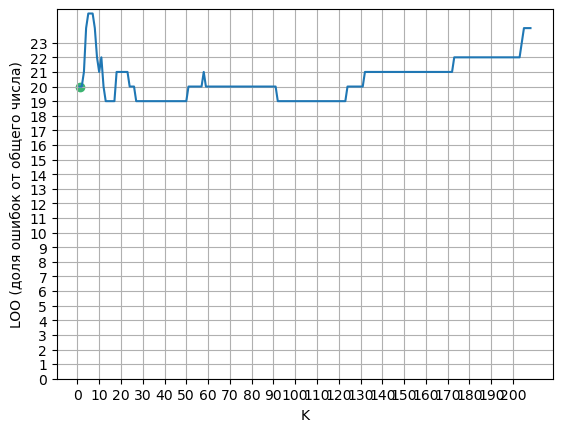

<Figure size 1500x400 with 0 Axes>

In [22]:
looseed = plot_loo(seedX, seedY)
looseed.figure(figsize=(20, 4))
looseed.show

Оптимальный k: 1, минимальная доля ошибок при нём: 41.0. K 175 с максимальной долей ошибок 62.0


<function matplotlib.pyplot.show(close=None, block=None)>

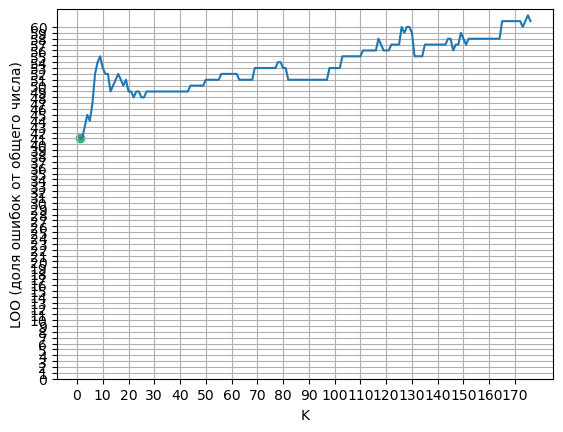

<Figure size 2500x5000 with 0 Axes>

In [23]:
column_names = ["0. Class", "1. Alcohol", "2. Malic acid", "3. Ash", "4. Alcalinity of ash", "5. Magnesium", "6. Total phenols", "7. Flavanoids", "8. Nonflavanoid phenols", "9. Proanthocyanins", "10. Color intensity", "11. Hue", "12. OD280/OD315 of diluted wines", "13. Proline"]
wine = pd.read_csv('C:/Users/hasse/source/repos/just_bsu/datasets/wine.data', sep=',',encoding='utf-8', names=column_names)
wineX = wine.drop(wine.columns[0], axis=1)
wineX = wineX.values
wineY = wine[wine.columns[0]]
wineY = wineY.values
wineY -= 1
loowine = plot_loo(wineX, wineY)

In [26]:
loowine.close()
loowine.figure(figsize=(10, 50))
loowine.show()

<Figure size 1000x5000 with 0 Axes>

In [27]:
looseed.show()

In [ ]:
predict = np.zeros(len(seedY)-2)
a = 0 #ошибки
na = 0 #правильные
for i in range(1, len(seedY)):#(len(Y)):
    prev = seedY[i] #пред класс
    p = seedX[i] #пред эл
    _X = np.delete(seedX, i, 0)
    _Y = np.delete(seedY, i)
    print(i)
    distances = np.zeros(len(seedX))
    for q in range(len(seedX)):
        distances[q] = np.linalg.norm(p - seedX[q], ord=2)
    dist_matrix = np.array([distances, seedY])
    sortD = dist_matrix[:, dist_matrix[0, :].argsort()] #отсортированный массив расстояний, где столбцы - ирисы, 0 строка - расстояния, 1 строка - соответствующие классы
    
    weights = np.zeros((2, np.unique(sortD[1]).size)) #0-я строка - названия классов, 1-я весы
    #weights = np.zeros(k + 1) #k-й элемент хранит суммарный вес
    for a in range(i):
        weights[int(sortD[1][a] - 1)] += Kernel(sortD[0][a], sortD[0][i]) 
        #if i > 10: print(weights)
    #print(sortD)
    predict[i] = np.argmax(weights)#судак-тудак 

    if (predict[i] != seedY[i]):
        a+=1
        print('{} {} {}'.format(predict[i], seedY[i], i))
    else:
        na+=1
        print('{} {} {}'.format(predict[i], seedY[i], i))

In [ ]:
#правильный loo
loo = np.zeros(len(X) - 2)
for i in range(len(X) - 2):
    loo[i] = LOO(i+1, X, Y)
KK = range(1, len(X) - 1)
plt.figure(figsize=(15, 4))
plt.plot(KK, loo)
plt.xlabel("K")
plt.ylabel("LOO (доля ошибок от общего числа)")
plt.scatter(KK[0], loo[0], c='mediumseagreen')
plt.xticks(np.arange(0, KK[len(KK) - 1], 10))
plt.yticks(np.arange(0, loo[len(loo) - 1], 1))
plt.grid(True)
plt.show()
print(np.argmin(loo)+1)

In [ ]:
species = KNN(new_iris, X, Y, 7)
print(species, iris.target_names[species])
print(Y[70], iris.target_names[Y[70]])

In [ ]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='Greens', edgecolors='grey')
formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.tight_layout()
plt.scatter(new_iris[0], new_iris[1], c=species, cmap='Greens')
#plt.scatter(X[55, 0], X[55, 1], c='mediumseagreen')
plt.show()
plt.clf()

In [ ]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='magma', edgecolors='grey')
formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.tight_layout(pad=1.08)
plt.show()
plt.clf()

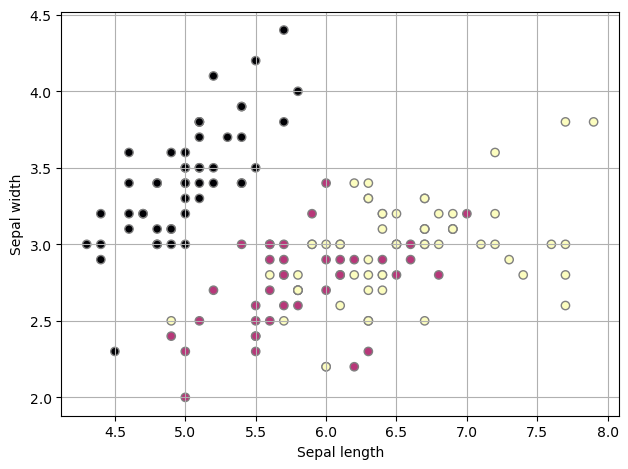

In [13]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='magma', edgecolors='grey')
#formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
#plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.tight_layout()
#plt.scatter(new_iris[0], new_iris[1], c='mediumseagreen', marker='p')
#plt.scatter(X[55, 0], X[55, 1], c='mediumseagreen')
#plt.show()